In [1]:
import numpy as np                                        # funciones numericas
import pandas as pd                                       # dataframes y utilidades
from datetime import timedelta                            # diferencia entre datos tipo tiempo

In [2]:
df_ce = pd.read_csv('Eventos.csv')
df_ce.drop(df_ce[df_ce['Currency'] != 'USD'].index, inplace=True)
df_ce = df_ce.reset_index(drop=True)

df_ce.drop(df_ce[df_ce['Volatility'] == '0'].index, inplace=True)
df_ce = df_ce.reset_index(drop=True)

df_ce.drop(df_ce[df_ce['Volatility'] == '1'].index, inplace=True)
df_ce = df_ce.reset_index(drop=True)

df_ce["Volatility"] = df_ce["Volatility"].str.replace('Medium', '2')
df_ce["Volatility"] = df_ce["Volatility"].str.replace('High', '3')
df_ce

,timestamp,Currency,Name,Volatility,actual,previous,consensus
0,01/06/2009 15:00,USD,Pending Home Sales (MoM),2,-4,-0.7,-1
1,01/06/2009 15:00,USD,Factory Orders (MoM),2,-6.5,-6,-2.3
2,01/06/2009 19:00,USD,FOMC Minutes,3,NaN,NaN,NaN
3,01/07/2009 13:15,USD,ADP Employment Change,3,-659,-476,-450
4,01/07/2009 15:35,USD,Barack Obama Press Conference,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9985,"2020, September 30, 07:30",USD,(Estados Unidos) Producto Interior Bruto anual...,3,-31.40%,-31.70%,-31.70%
9986,"2020, September 30, 08:45",USD,(Estados Unidos) Índice de gestores de compra ...,2,62.4,51.2,52
9987,"2020, September 30, 09:00",USD,(Estados Unidos) Variación de ventas de vivien...,2,8.80%,5.90%,3.20%
9988,"2020, September 30, 09:30",USD,(Estados Unidos) Cambio en reservas de petróle...,2,-1.98M,-1.64M,1.569M


In [3]:
# eliminar los casos donde exista un nan en algun renglon
df_ce = df_ce.dropna()
df_ce = df_ce.reset_index(drop=True)
df_ce = df_ce.iloc[np.where(df_ce['actual'] != 0)[0][0]:len(df_ce['timestamp'])]
df_ce = df_ce.reset_index(drop=True)

df_ce['mes'] = [pd.to_datetime(df_ce['timestamp'][i]).strftime('%m')
                for i in range(0, len(df_ce['timestamp']))]
unicos = list(set(df_ce['Name']))
longitudes = [len(df_ce[df_ce['Name'] == unicos[i]]) for i in range(0, len(unicos))]
res = [idx for idx, val in enumerate(longitudes)]
ind_semanales = [unicos[i] for i in res]

# funcion wow
df_ce_w = df_ce[df_ce['Name'].isin(ind_semanales)]
df_ce_w = df_ce_w.reset_index(drop=True)
df_ce_w

,timestamp,Currency,Name,Volatility,actual,previous,consensus,mes
0,01/06/2009 15:00,USD,Pending Home Sales (MoM),2,-4,-0.7,-1,01
1,01/06/2009 15:00,USD,Factory Orders (MoM),2,-6.5,-6,-2.3,01
2,01/07/2009 13:15,USD,ADP Employment Change,3,-659,-476,-450,01
3,01/08/2009 13:30,USD,Initial Jobless Claims,2,467,491,540,01
4,01/09/2009 13:30,USD,Average Hourly Earnings (MoM),3,0.3,0.4,0.2,01
...,...,...,...,...,...,...,...,...
6603,"2020, September 30, 07:30",USD,(Estados Unidos) PCE subyacente (QoQ),2,-0.80%,-1.00%,-1.00%,09
6604,"2020, September 30, 07:30",USD,(Estados Unidos) Producto Interior Bruto anual...,3,-31.40%,-31.70%,-31.70%,09
6605,"2020, September 30, 08:45",USD,(Estados Unidos) Índice de gestores de compra ...,2,62.4,51.2,52,09
6606,"2020, September 30, 09:00",USD,(Estados Unidos) Variación de ventas de vivien...,2,8.80%,5.90%,3.20%,09


In [4]:
# convertir timestamp a formato datetime localizado a huso horario de interes
df_ce_w['timestamp'] = pd.to_datetime(df_ce_w['timestamp']).dt.floor('Min')
df_ce_w['timestamp'] = df_ce_w['timestamp'].dt.tz_localize('UTC')

# dejar solo indicadores que haya sucedido dentro de ventana de horarios bursatiles
for i in range(0, len(df_ce_w['timestamp'])):
    if (df_ce_w['timestamp'][i]).today().day >= 6 and (df_ce_w['timestamp'][i]).hour >= 15:
        df_ce_w.drop(i, inplace=True)

In [5]:
df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Redbook Index (YoY)'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'EIA Crude Oil Stocks Change'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Markit Manufacturing PMI'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'MBA Mortgage Applications'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Consumer Confidence  United States'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Retail Sales (MoM)'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Retail Sales (YoY)'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Business Climate'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

df_ce_w.drop(df_ce_w[df_ce_w['Name'] == 'Markit Services PMI'].index, inplace=True)
df_ce_w = df_ce_w.reset_index(drop=True)

In [6]:
df_ce_w['Name'] = [df_ce_w['Currency'][i] + ' ' + df_ce_w['Name'][i] for i in range(0, len(df_ce_w['Name']))]

In [44]:
df_ce_w.tail(22)

,timestamp,Currency,Name,Volatility,actual,previous,consensus,mes
6164,2020-09-21 07:30:00+00:00,USD,USD (Estados Unidos) Índice de actividad nacio...,2,0.79,2.54,1.95,09
6165,2020-09-22 09:00:00+00:00,USD,USD (Estados Unidos) Venta de viviendas existe...,3,6.00M,5.86M,6.0M,09
6166,2020-09-23 08:00:00+00:00,USD,USD (Estados Unidos) Índice de precios de vivi...,2,1.00%,1.00%,0.50%,09
6167,2020-09-23 08:45:00+00:00,USD,USD (Estados Unidos) Markit PMI manufacturero,2,53.5,53.1,53.2,09
6168,2020-09-23 08:45:00+00:00,USD,USD (Estados Unidos) Markit PMI de servicios,2,54.6,55,54.7,09
6169,2020-09-23 09:30:00+00:00,USD,USD (Estados Unidos) Cambio en reservas de pet...,2,-1.64M,-4.39M,-2.325M,09
6170,2020-09-24 07:30:00+00:00,USD,USD (Estados Unidos) Peticiones de desempleo c...,2,12.58M,12.75M,12.339M,09
6171,2020-09-24 07:30:00+00:00,USD,USD (Estados Unidos) Peticiones semanales de s...,3,870.00K,866.00K,843.0K,09
6172,2020-09-24 09:00:00+00:00,USD,USD (Estados Unidos) Venta de viviendas nuevas...,3,1.01M,0.96M,0.89M,09
6173,2020-09-25 07:30:00+00:00,USD,USD (Estados Unidos) Peticiones de bienes dura...,3,0.40%,11.70%,1.50%,09


In [8]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key='S7LAJYJXKS29HWS8',output_format='pandas')
%matplotlib inline 
plt.rcParams['figure.figsize']= 16,8
plt.style.use('seaborn-darkgrid')
import plotly.graph_objects as go
from urllib.parse import urlencode
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [51]:
quotes, meta_data = ts.get_daily(symbol='USDMXN', outputsize='full')
del(quotes['5. volume'])
quotes = quotes.rename(columns = {'1. open':'Open', '2. high':'High', '3. low':'Low', '4. close':'Close'})

In [52]:
quotes = quotes[::-1]

In [55]:
def g_velas(p0_de):
    """
    :param p0_de: data frame con datos a graficar
    :return fig:

    p0_de = datos_dd
    p1_pa = 'sell'
    datos_dd = pd.DataFrame({'timestamp': [], 'open': [], 'high': [], 'low': [], 'close': []}, index=[])
    """

    p0_de.columns = [list(p0_de.columns)[i].lower() for i in range(0, len(p0_de.columns))]

    fig = go.Figure(data=[go.Candlestick(x=p0_de.index,
                                         open=p0_de['open'], high=p0_de['high'],
                                         low=p0_de['low'], close=p0_de['close'])])

    fig.update_layout(margin=go.layout.Margin(l=50, r=50, b=20, t=50, pad=0),
                      title=dict(x=0.5, y=1, text='Precios Historicos OHLC'),
                      xaxis=dict(title_text='Hora del dia', rangeslider=dict(visible=False)),
                      yaxis=dict(title_text='Precio del USDMXN'))

    fig.layout.autosize = False
    fig.layout.width = 840
    fig.layout.height = 520

    return fig

In [56]:
g_velas(quotes)

In [57]:
def g_velas_reaccion(p0_de):
    """
    :param p0_de: data frame con datos a graficar
    :return fig:

    p0_de = datos_dd
    p1_pa = 'sell'
    datos_dd = pd.DataFrame({'timestamp': [], 'open': [], 'high': [], 'low': [], 'close': []}, index=[])
    """

    # p0_de['timestamp'] = [(pd.to_datetime(p0_de['timestamp']))[x].tz_localize('UTC')
    #                           for x in range(0, len(p0_de['timestamp']))]

    f_i = p0_de.index[0]

    yini = p0_de['high'][0]
    yfin = max(p0_de['high'])
    fig = go.Figure(data=[go.Candlestick(x=p0_de.index,
                                         open=p0_de['open'], high=p0_de['high'],
                                         low=p0_de['low'], close=p0_de['close'])])

    lineas = [dict(x0=f_i, x1=f_i, xref='x', y0=yini, y1=yfin, yref='y', type='line',
                   line=dict(color='red', width=1.5, dash='dashdot'))]

    fig.update_layout(margin=go.layout.Margin(l=50, r=50, b=20, t=50, pad=0),
                      title=dict(x=0.5, text='Reacción del precio (intradía) ante el comunicado de un'
                                             ' <b> indicador económico </b>'),
                      xaxis=dict(title_text='Hora del dia', rangeslider=dict(visible=False)),
                      yaxis=dict(title_text='Precio del EurUsd'),
                      annotations=[go.layout.Annotation(x=f_i, y=1.025, xref="x",
                                                        yref="paper", showarrow=False,
                                                        text="Indicador Comunicado")],
                      shapes=lineas)

    fig.layout.autosize = False
    fig.layout.width = 840
    fig.layout.height = 520

    return fig

In [58]:
g_velas_reaccion(quotes)

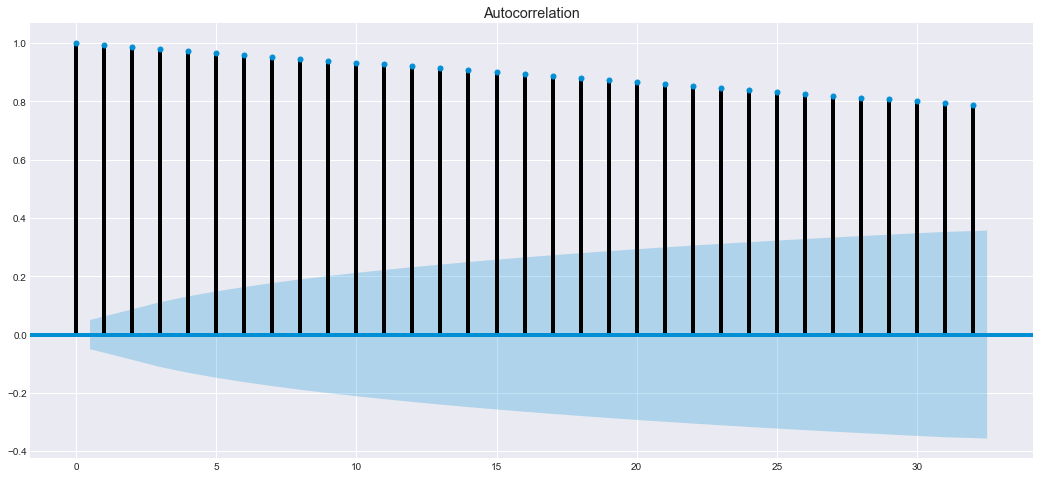

In [59]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(quotes['close'])
plt.show()

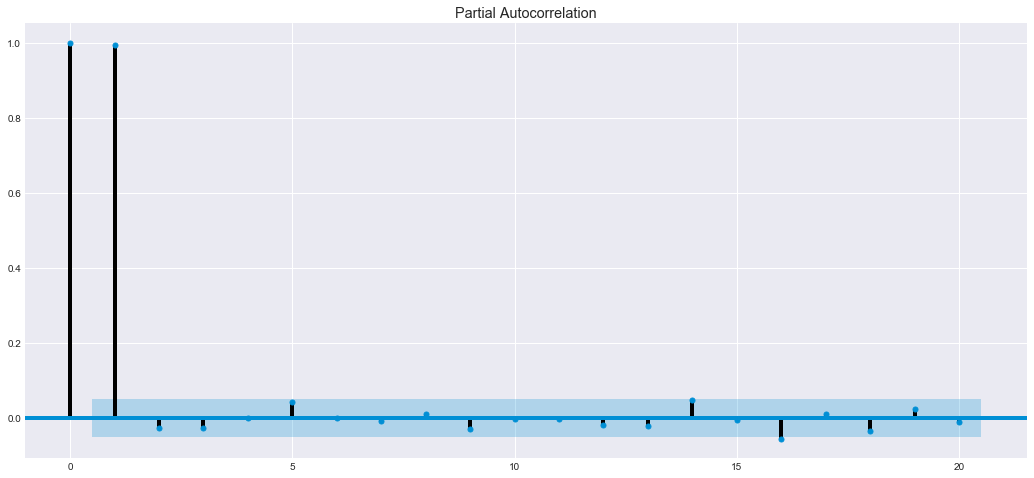

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(quotes['close'], lags=20)
plt.show()

In [78]:
def f_escenario(p0_datos):
    """
    :param: pd.DataFrame : DataFrame : calendario economico con columnas: timestamp, name,
                                                                     actual, consensus, previous
    :return:
    """

    datos = p0_datos

    # inicializar la columna escenario, habra los siguientes: A, B, C, D
    datos['escenario'] = 'X'

    # -- -- A: actual >= previous & actual >= consensus & consensus >= previous
    datos['escenario'][((datos['actual'] >= datos['previous']) &
                        (datos['actual'] >= datos['consensus']))] = 'A'

    # -- -- B: actual >= previous & actual >= consensus & consensus < Precious
    datos['escenario'][((datos['actual'] >= datos['previous']) &
                        (datos['actual'] < datos['consensus']))] = 'B'

    # -- -- C: actual >= previous & actual < consensus & consensus >= previous
    datos['escenario'][((datos['actual'] < datos['previous']) &
                        (datos['actual'] >= datos['consensus']))] = 'C'

    # -- -- D: actual >= previous & actual < consensus & consensus < previous
    datos['escenario'][((datos['actual'] < datos['previous']) &
                        (datos['actual'] < datos['consensus']))] = 'D'

    return datos

In [79]:
f_escenario(df_ce_w)

,timestamp,Currency,Name,Volatility,actual,previous,consensus,mes,escenario
0,2009-01-06 15:00:00+00:00,USD,USD Pending Home Sales (MoM),2,-4,-0.7,-1,01,A
1,2009-01-06 15:00:00+00:00,USD,USD Factory Orders (MoM),2,-6.5,-6,-2.3,01,A
2,2009-01-07 13:15:00+00:00,USD,USD ADP Employment Change,3,-659,-476,-450,01,A
3,2009-01-08 13:30:00+00:00,USD,USD Initial Jobless Claims,2,467,491,540,01,D
4,2009-01-09 13:30:00+00:00,USD,USD Average Hourly Earnings (MoM),3,0.3,0.4,0.2,01,C
5,2009-01-09 13:30:00+00:00,USD,USD Unemployment Rate,3,7.2,6.7,7,01,A
6,2009-01-09 13:30:00+00:00,USD,USD Average Weekly Hours,3,33.3,33.5,33.5,01,D
7,2009-01-09 13:30:00+00:00,USD,USD Nonfarm Payrolls,3,-577,-584,-480,01,C
8,2009-01-13 13:30:00+00:00,USD,USD Trade Balance,3,-41.58,-56.69,-51.4,01,D
9,2009-01-14 13:30:00+00:00,USD,USD Retail Sales ex Autos (MoM),3,-3.1,-2.5,-1.4,01,A
